In [25]:
# Triada calsica
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import warnings
import missingno as msngo

from pygam import LinearGAM, s

# Machine Learning
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, median_absolute_error, r2_score

warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (20, 10)
plt.style.use('seaborn-darkgrid')

In [26]:
df = pd.read_csv('Datasets/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
df.drop(['zipcode', 'id', 'date'], axis = 1, inplace = True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503


In [28]:
print(f'''La base de datos se compone de las siguientes observaciones
Numero de filas: {df.shape[0]}
Numero de columnas: {df.shape[1]}''')

La base de datos se compone de las siguientes observaciones
Numero de filas: 21613
Numero de columnas: 18


In [29]:
sub = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot']]
#Dividimos en conjunto de entrenamiento y validacion
X_train_pre, X_test_pre, y_train, y_test = train_test_split(sub, df['price'], test_size = .33, random_state = 15820)
# Ajustamos el estandarizador al conjunto de entrrenamiento
scaler = StandardScaler().fit(X_train_pre)

In [30]:
# Con el estandarizador ajustado sobre el conjunto de entrenamiento, transformamos el conjunto de entrenamiento
X_train = pd.DataFrame(scaler.transform(X_train_pre), columns = X_train_pre.columns)
X_test = pd.DataFrame(scaler.transform(X_test_pre), columns = X_test_pre.columns)


In [31]:
lams = np.logspace(-3, 3, 3)

In [32]:
lams = [lams]*len(X_train.columns)
lams

[array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03]),
 array([1.e-03, 1.e+00, 1.e+03])]

In [33]:
gam = LinearGAM(s(0) + s(1) + s(2) + s(3), fit_intercept = True)

In [34]:
gam.gridsearch(X_train.values, y_train.values, lam = lams)

  0% (0 of 81) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--
  1% (1 of 81) |                         | Elapsed Time: 0:00:00 ETA:   0:00:16
  2% (2 of 81) |                         | Elapsed Time: 0:00:00 ETA:   0:00:15
  3% (3 of 81) |                         | Elapsed Time: 0:00:00 ETA:   0:00:15
  4% (4 of 81) |#                        | Elapsed Time: 0:00:00 ETA:   0:00:15
  6% (5 of 81) |#                        | Elapsed Time: 0:00:01 ETA:   0:00:15
  7% (6 of 81) |#                        | Elapsed Time: 0:00:01 ETA:   0:00:14
  8% (7 of 81) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:14
  9% (8 of 81) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:15
 11% (9 of 81) |##                       | Elapsed Time: 0:00:01 ETA:   0:00:15
 12% (10 of 81) |##                      | Elapsed Time: 0:00:02 ETA:   0:00:14
 13% (11 of 81) |###                     | Elapsed Time: 0:00:02 ETA:   0:00:14
 14% (12 of 81) |###                    

LinearGAM(callbacks=[Deviance(), Diffs()], fit_intercept=True, 
   max_iter=100, scale=None, 
   terms=s(0) + s(1) + s(2) + s(3) + intercept, tol=0.0001, 
   verbose=False)

In [35]:
X_train.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot'], dtype='object')

In [36]:
gam.statistics_.keys()

dict_keys(['n_samples', 'm_features', 'edof_per_coef', 'edof', 'scale', 'cov', 'se', 'AIC', 'AICc', 'pseudo_r2', 'GCV', 'UBRE', 'loglikelihood', 'deviance', 'p_values'])

In [37]:
gam.lam

[[0.001], [0.001], [0.001], [0.001]]

In [38]:
gam.summary()

LinearGAM                                                                                                 
=============================================== ==========================================================
Distribution:                        NormalDist Effective DoF:                                     55.7429
Link Function:                     IdentityLink Log Likelihood:                               -372019.8051
Number of Samples:                        14480 AIC:                                           744153.0959
                                                AICc:                                          744153.5503
                                                GCV:                                       57784601535.602
                                                Scale:                                    57384328739.1798
                                                Pseudo R-Squared:                                   0.5863
Feature Function                  Lam

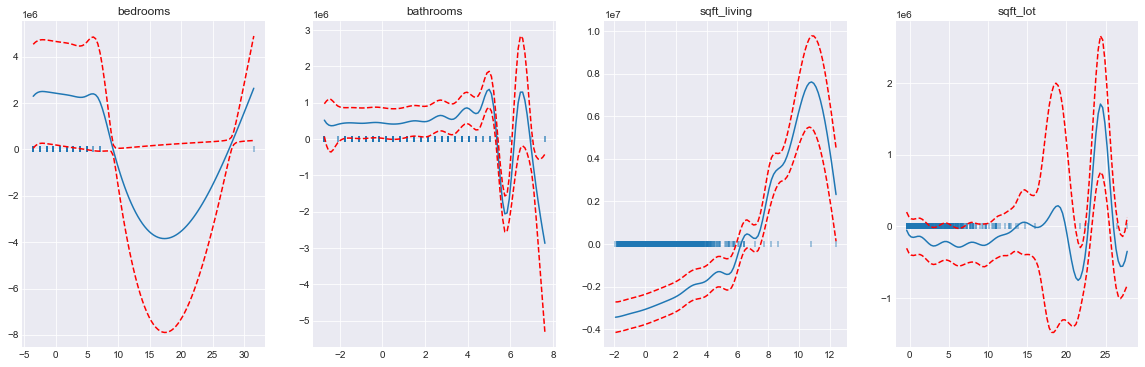

In [39]:
fig, axs = plt.subplots(1,4, figsize =(20,6))

titles = X_train.columns

for i, ax in enumerate (axs.flatten()):
        XX = gam.generate_X_grid(term=i)
        ax.plot(XX[:, i], gam.partial_dependence(term = i, X = XX))
        ax.plot(XX[:, i], gam.partial_dependence(term = i, X = XX, width = .95)[1], c = 'r', ls = '--')
        ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
        ax.set_title(titles[i])

In [40]:
new_gam = LinearGAM(lam = 1e6).fit(X_train, y_train)

In [41]:
def report_metrics(model, x_test, y_test):
        preds = model.predict(x_test)
        print(f'''
        Test R2: {r2_score(y_test, preds)}
        Test MSE: {mean_squared_error(y_test, preds)}
        Test Median Absolute Error: {median_absolute_error(y_test, preds)}''')

In [42]:
print(f'Metricas para el primer modelo entrenado con lambda: {gam.lam}\n')
report_metrics(gam, X_test, y_test)


Metricas para el primer modelo entrenado con lambda: [[0.001], [0.001], [0.001], [0.001]]


        Test R2: 0.45724496654594093
        Test MSE: 69394713857.0409
        Test Median Absolute Error: 117882.0943671657


In [43]:
print(f'Metricas para el segundo modelo entrenado con lambda: {new_gam.lam}\n')
report_metrics(new_gam, X_test, y_test)


Metricas para el segundo modelo entrenado con lambda: [[1000000.0], [1000000.0], [1000000.0], [1000000.0]]


        Test R2: 0.49219268528968585
        Test MSE: 64926423758.01633
        Test Median Absolute Error: 126460.31766934425


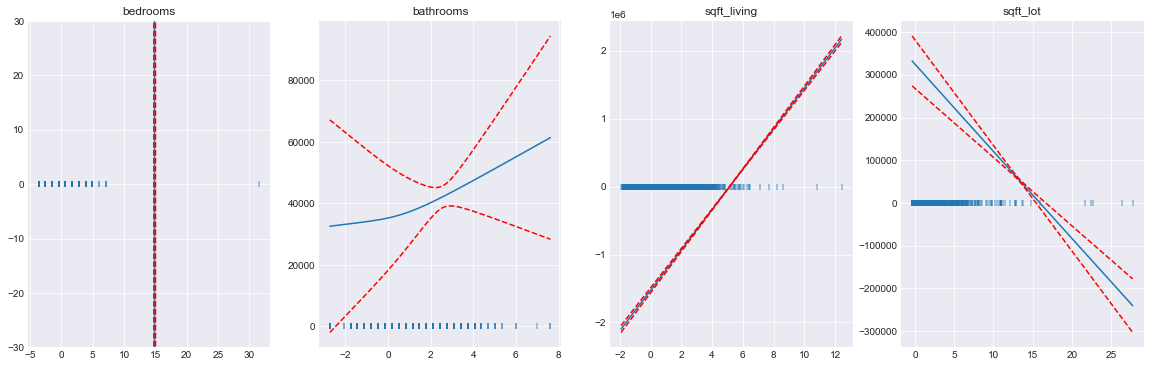

In [44]:
fig, axs = plt.subplots(1,4, figsize =(20,6))

titles = X_train.columns

for i, ax in enumerate (axs.flatten()):
        XX = new_gam.generate_X_grid(term = i)
        ax.plot(XX[:, i], new_gam.partial_dependence(term = i, X = XX))
        ax.plot(XX[:, i], new_gam.partial_dependence(term = i, X = XX, width = .95)[1], c = 'r', ls = '--')
        if i == 0:
                ax.set_ylim(-30,30)
        ax.scatter(X_train[titles[i]], [0] * len(X_train[titles[i]]), marker = '|', alpha = .5)
        ax.set_title(titles[i])